### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





## Project: Will Customer Accept Coupon?

## Problem Statement
Once a specific coupon is delivered, what driver’s attributes, driving conditions, demographic factors, and coupon attributes most influence a driver's likelihood of accepting a specific coupon?


<a id="analysis-outline"></a>
## Analysis Outline


- [Data Description](#Data-Description)
- [Section 1 Data Review, Cleaning, and General Acceptance Rate Insights](#Part-1)
- [Section 2 Investigating the Bar Coupons](#Part-2)
- [Section 3 Independent Investigation – Other Attributes](#Part-3)
- [Section 4 Correlation Analysis](#Part-4)
- [Section 5 Next Steps and Recommendations](#Part-5)


## Executive Summary

Overall, these data analytics insights suggest that coupon acceptance is shaped by a combination of coupon attributes (type, time), contextual attributes (companions, time, weather, destination urgency), and user attributes (gender, age, marital status, education). The consistency between descriptive rates and inferential relationships strengthens confidence in these findings:

**Descriptive Analysis:**
1. **Coupon** Carry out & Take away has the highest acceptance rate = 73% vs Restaurant(<20)  the 2nd highest =71% vs. Bar the lowest = 41%
2. **Bar**: Those who are more often to go to Bar have higher acceptance rate, 4-8 times has the highest rate = 64%
    - For Bar-goers > 1/month, no kid passengers or age under 30 could have higher acceptance rate >=62%
    - Cheap restaurants-goers and low income acceptance rate = 60% (> average acceptance rate = 57%)
3. **Destination** No Urgent Place have the highest acceptance rate = 63% vs Work or Home rate only around 50%
4. **Passanger** Friend(s) has the highest acceptance rate = 67% vs Kid(s) lowest 50% 
5. **Weather** Sunny has the highest acceptance rate = 59% (a little over average rate 57%) vs Rainy lowest 46%
6. **Temperature** 80 has the highest acceptance rate = 60% vs 30 = 53%
7. **Time** 2PM have the highest acceptance rate = 66% vs 10AM = 61% as the second highest vs 7AM lowest 50%
8. **Expiration** in 1 day accpetance rate = 62% vs 2 hours = only 50%
9. **Gender** Male accpetance rate = 59% vs Female = 55%
10. **Age** below 21 has the highest rate = 63% vs. Age 50 puls lowest 51%: the higher age, the lower rate
11. **Marital Status** Single has the highest rate = 60%, Unmarried partner = 56% vs Widowed lowest 48%
12. **Drivers** no children` rate = 59% higher than those with children = 54%
13. **Education** with some high school has the highest rate = 72% vs graduate degree = 52%, the higher education, the lower rate
14. **Occupation** in Healthcare and Construction related occupation has higher rate ~70% vs. Retired lowest 46%
15. **CoffeeHouse** 1~3 has the highest rate = 65% vs never = 46%
16. **CarryAway** greater than once has the highest rate 58%
17. Both **RestaurantLessThan20** and **Restaurant20To50** greater than 8 times has the highest rate 61% vs never around 52%
18. Not much difference in rate between same or opposite direction

**Correlation Analysis:**
- Features showed moderate positive correlation with coupon acceptance (Y), including:
   coupon_Carry out & Take away, coupon_Restaurant(<20), destination_No Urgent Place, expiration_2h, passanger_Friend(s),
   CoffeeHouse_never, toCoupon_GEQ25min, weather_Sunny, coupon_Coffee House, coupon_Restaurant(20-50)
  
- Correlation between **Destination** No Urgent Place (acceptance rate = 63%) and **Passanger** Friend(s) (67%) shows high (0.6)

- Statistical significance of these relationships implies non-random influence; Visualizations and grouped means (groupby().mean()) across categories confirmed patterns observed in descriptive stats and hinted at potential predictive variables.
   - e.g., When age is below21, the acceptance rate is highest 63%, the rate increasing with age decreasing, the younger age, more likely to accept.

***

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

[Back to Top](#analysis-outline)

### Section 1 Data Review, Cleaning, and General Acceptance Rate Insights


#### Section 1 Summary
##### Part 1 Data Review and Cleaning
 - **Data Before Cleaning: Rows = 12,684 rows | Columns =  26**
 - Identified 6 columns with missing: 
   - car: 12,576 missing - Action: dropped
   - Bar: 107 missing - Action: replaced by most frequent value(s)
   - CoffeeHouse: 217 missing - Action: replaced by most frequent value(s)
   - CarryAway: 151 - Action: replaced by most frequent value(s)
   - RestaurantLessThan20: 130 - Action: replaced by most frequent value(s)
   - Restaurant20To50: 189 - Action: replaced by most frequent value(s)
 - dentified 74 duplicated rows - Action: dropped
 - toCoupon_GEQ5min column only has one value which is 1 so not useful - Action: dropped
 - **Data After Cleaning: Rows = 12,610 | Columns = 24**

##### Part 2 General Acceptance Rate Insights

•	Overall, **57%** of the total observations chose to accept the coupon

•	Coupon Type Comparison

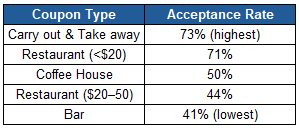


•	Acceptance by Temperature

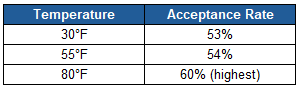

In [1]:
# Import libraries
import pandas as pd
pd.options.display.max_rows=10
import numpy as np
import os
from scipy.stats import uniform, norm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Ignore any warnings
import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Code that might trigger warnings
    warnings.warn("This warning will be hidden", UserWarning)

#### Use the prompts below to get started with your data analysis.  
#### Part 1 Data Review and Clearning
##### 1. Read in the `coupons.csv` file.

In [3]:
data = pd.read_csv('coupons.csv')

In [4]:
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


##### 2. Investigate the dataset for missing or problematic data.


Top 2 Rows:



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0



Bottom 2 Rows:



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0



Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0



Data Table: Row x Column



(12684, 26)


Data Table: Column Names and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object

None


Unique Values by Column:



destination          3
passanger            4
weather              3
temperature          3
time                 5
                    ..
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
Length: 26, dtype: int64


Duplicated Row(s): 



74


Missing Values by Column:



destination          0
passanger            0
weather              0
temperature          0
time                 0
                    ..
toCoupon_GEQ15min    0
toCoupon_GEQ25min    0
direction_same       0
direction_opp        0
Y                    0
Length: 26, dtype: int64

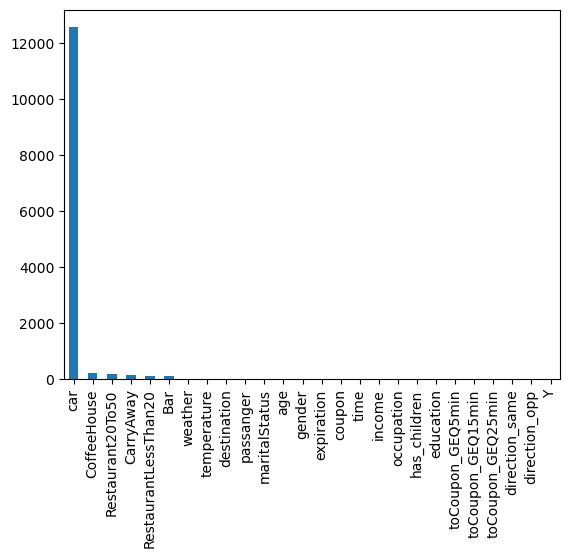

In [5]:
def df_eds(df,head_size = 2, tail_size = 2, show_info = True):
    '''print df summary statistics to screen'''
    
    print(f"\nTop {head_size} Rows:\n")                                   # Review Top 5 Rows
    display(df.head(head_size))
    
    print(f"\nBottom {tail_size} Rows:\n")                                # Review Bottom 5 Rows
    display(df.tail(tail_size))
    
    print("\nDescriptive Statistics:\n")                       # Review Descriptive Statistics
    display(df.describe().transpose())
    # df_hc['col'].value_counts(normalize = True)
    if show_info:            
        print("\nData Table: Row x Column\n")                  # Review # of Row x By of Column
        display(df.shape)
    
        print("\nData Table: Column Names and Data Types\n")   # Review Column Names and Data Types
        display(df.info())
    
        print("\nUnique Values by Column:\n")                  # Review Unique Values by Column
        display(df.nunique())

        print("\nDuplicated Row(s): \n")                  # Review Unique Values by Column
        display(df[df.duplicated()].shape[0])
        
        # gapminder.continent.unique()
        print("\nMissing Values by Column:\n")                 # Review Missing Values By Column
        display(df.isnull().sum())                          # df.isna().sum()    
        df.isnull().sum().sort_values(ascending=False).plot(kind = 'bar')                          # df.isna().sum()    
        plt.show()
df_eds(data)

In [12]:
# Review the columns with missings
col=['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

for i in col:
    print(f'{i} Distribution:\n', data[i].value_counts(dropna=False),'\n\n')

car Distribution:
 car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64 


Bar Distribution:
 Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64 


CoffeeHouse Distribution:
 CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64 


CarryAway Distribution:
 CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64 


RestaurantLessThan20 Distribution:
 RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64 


Restaurant20To50 Distribution:
 Restaurant


Top 2 Rows:



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4191,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1



Bottom 2 Rows:



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8516,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1



Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
temperature,148.0,69.189189,18.480124,30.0,55.0,80.0,80.0,80.0
has_children,148.0,0.351351,0.479014,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,148.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,148.0,0.851351,0.356950,0.0,1.0,1.0,1.0,1.0
toCoupon_GEQ25min,148.0,0.648649,0.479014,0.0,0.0,1.0,1.0,1.0
direction_same,148.0,0.081081,0.273886,0.0,0.0,0.0,0.0,1.0
direction_opp,148.0,0.918919,0.273886,0.0,1.0,1.0,1.0,1.0
Y,148.0,0.716216,0.452364,0.0,0.0,1.0,1.0,1.0



Data Table: Row x Column



(148, 26)


Data Table: Column Names and Data Types

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 4191 to 8516
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           148 non-null    object
 1   passanger             148 non-null    object
 2   weather               148 non-null    object
 3   temperature           148 non-null    int64 
 4   time                  148 non-null    object
 5   coupon                148 non-null    object
 6   expiration            148 non-null    object
 7   gender                148 non-null    object
 8   age                   148 non-null    object
 9   maritalStatus         148 non-null    object
 10  has_children          148 non-null    int64 
 11  education             148 non-null    object
 12  occupation            148 non-null    object
 13  income                148 non-null    object
 14  car                   0 non-null      object
 15 

None


Unique Values by Column:



destination          3
passanger            4
weather              3
temperature          3
time                 5
                    ..
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
Length: 26, dtype: int64


Duplicated Row(s): 



74


Missing Values by Column:



destination          0
passanger            0
weather              0
temperature          0
time                 0
                    ..
toCoupon_GEQ15min    0
toCoupon_GEQ25min    0
direction_same       0
direction_opp        0
Y                    0
Length: 26, dtype: int64

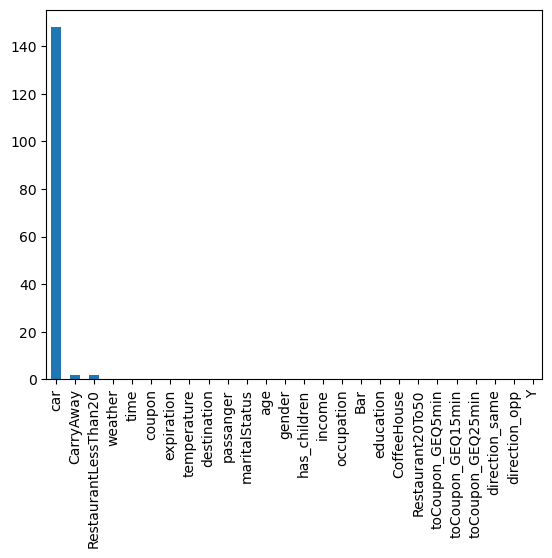

In [9]:
# Review the rows with duplicates
# Extract duplicated rows (excluding the first occurrence)
duplicates = data[data.duplicated(keep=False)]
df_eds(duplicates)

#### 3. Decide what to do about your missing data -- drop, replace, other...

 - car: most of car (>99.9%) are missing values
      - action: drop the column for now
 - toCoupon_GEQ5min: only has one value
      - action: drop the column
 - duplicated row(s): 74
      - action: drop the duplicates for now
  
**Based on the data profiling above:**

**1). For 'car', it will be dropped since most of the value are missing with very thin pupulated data** 

In [10]:
data1=data.drop(['car', 'toCoupon_GEQ5min'], axis=1)
# Review number of columns in data1
data.shape, data1.shape

((12684, 26), (12684, 24))

**2). Drop 74 duplicates**

In [11]:
data2 = data1.drop_duplicates()  
print("After removing duplicates:", data2.shape)

After removing duplicates: (12610, 24)


**3). Clean up potential spaces in column names**

In [12]:
data2.columns = data2.columns.str.replace(' ', '')
data2.columns
data3=data2.copy() # data3 is created for imputing missing values

**4). Replace missing values in the data columns by more frequent values**
- For 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50', since the missing percentage is small, the missign will be replaced by most freq

In [13]:
col1=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in col1:
    mode_val = data3[i].mode()[0]
    data3[i] = data3[i].fillna(mode_val)
    print(f'{i} Distribution')
    print("-" * 30)
    print(f'Before Replacing Missing:\n', data2[i].value_counts(dropna=False),'\n')
    print(f'After Replacing Missing:\n', data3[i].value_counts(dropna=False),'\n\n')
    print("-" * 30)

Bar Distribution
------------------------------
Before Replacing Missing:
 Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
NaN       107
Name: count, dtype: int64 

After Replacing Missing:
 Bar
never    5285
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64 


------------------------------
CoffeeHouse Distribution
------------------------------
Before Replacing Missing:
 CoffeeHouse
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
NaN       217
Name: count, dtype: int64 

After Replacing Missing:
 CoffeeHouse
less1    3579
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64 


------------------------------
CarryAway Distribution
------------------------------
Before Replacing Missing:
 CarryAway
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
NaN       150
Name: count, dtype: int64 

After Replacing Missing:
 CarryAway
1~3      4795
4~8      4242
less1  

#### Part 2 Investigating the Bar Coupons

##### 4. What proportion of the total observations chose to accept the coupon?
 - **57%** of the total observations chose to accept the coupon



In [15]:
round(data3['Y'].mean(),2)

np.float64(0.57)

##### 5. Use a bar plot to visualize the `coupon` column.
 - From the bar plot and groupby, the acceptance rate by coupon type
      - Carry out & Take away is the highest (73%) - higher than average 57%
      - Restaurant(<20) is the second highest (71%) - higher than average 57%
      - Coffee House is 50%
      - Restaurant(20-50) is 44%
      - Bar	is the lowest (41%)

In [14]:
# Get value counts
counts = data3['coupon'].value_counts().reset_index()
counts.columns = ['coupon', 'count']
counts

,coupon,count
0,Coffee House,3989
1,Restaurant(<20),2779
2,Carry out & Take away,2344
3,Bar,2010
4,Restaurant(20-50),1488


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

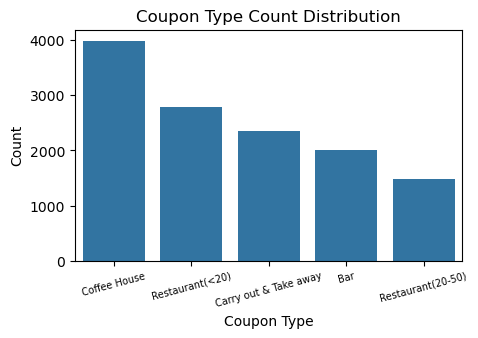

In [16]:
plt.figure(figsize=(5,3))  # Try (3,2) or (5,3) for different balances

sns.barplot(counts, x="coupon", y='count')
plt.title("Coupon Type Count Distribution", fontsize=12)
plt.xlabel("Coupon Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=15,fontsize=7)
# Seaborn performs data1.groupby('coupon')['Y'].mean()

In [76]:
round(data3.groupby('coupon')[['Y']].mean().sort_values(by='Y', ascending=False),2)

,Y
coupon,
Carry out & Take away,0.73
Restaurant(<20),0.71
Coffee House,0.50
Restaurant(20-50),0.44
Bar,0.41


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

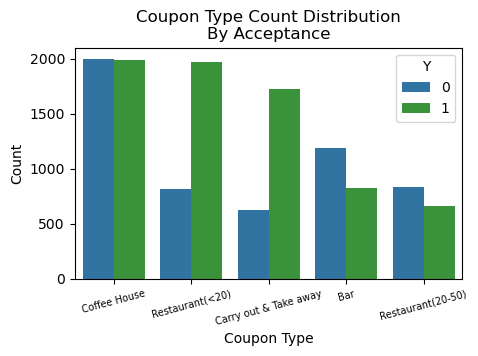

In [28]:
# Sort coupon types by total count
order = data3["coupon"].value_counts().index
# Set custom colors: green and yellow
custom_palette = ["#1f77b4", "#2ca02c"]  # Blue for 0, Green for 1

plt.figure(figsize=(5,3))  # Try (3,2) or (5,3) for different balances
sns.countplot(data3, x="coupon", hue="Y", order=order,palette=custom_palette) 
plt.title("Coupon Type Count Distribution\nBy Acceptance", fontsize=12)
plt.xlabel("Coupon Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=15,fontsize=7)

##### 6. Use a histogram to visualize the temperature column.
     From the histogram plot and groupby, the acceptance rate by temperature
     - when temperature is 30, the rate is 53%
     - when temperature is 55, the rate is 54%
     - when temperature is 80, the rate is 60%


In [84]:
data3['temperature'].value_counts()

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

In [85]:
round(data3.groupby('temperature')[['Y']].mean(),2)

,Y
temperature,
30,0.53
55,0.54
80,0.60


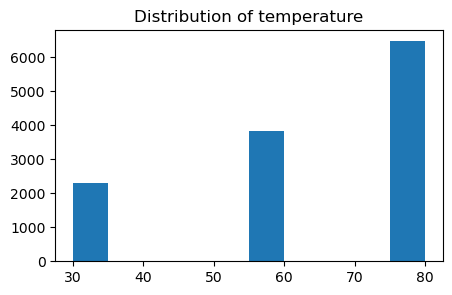

In [27]:
plt.figure(figsize=(5,3))  # Try (3,2) or (5,3) for different balances 
plt.hist(data3['temperature'], color="#1f77b4", alpha = 1) # edgecolor = 'black' 
plt.title('Distribution of temperature'); 


[Back to Top](#analysis-outline)
### Section 2 Investigating the Bar Coupons

#### Section 2 Summary

 - Coupon type `Carry out & Take away` has the highest acceptance rate = 73% vs `Restaurant(<20)` =71% vs. `Bar` lowest = 41%
 - For Bar-goers > 1/month, no kid passengers or age under 30 could have higher acceptance rate >=62% & Cheap restaurants-goers and low income acceptance rate = 60% (higher than average acceptance rate = 57%)
***
Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [100]:
data3['coupon'].value_counts()

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [134]:
round(data3.groupby('coupon')[['Y']].mean(),3).sort_values(by = 'Y', ascending=False)

,Y
coupon,
Carry out & Take away,0.734
Restaurant(<20),0.708
Coffee House,0.499
Restaurant(20-50),0.442
Bar,0.410


In [104]:
df_Barcoupon = data3[data3['coupon']=='Bar']
df_Barcoupon.shape[0]

2010

In [105]:
df_Barcoupon.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,1,0


#### 2. What proportion of bar coupons were accepted?
  - **41%** of bar coupons were accepted


In [106]:
round(df_Barcoupon['Y'].mean(),2)

np.float64(0.41)

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
 - For those who went to a bar 3 or fewer times a month, the acceptance rate is 0.56
 - For those who went to a bar more than 3 times a month, the acceptance rate is 0.62

In [108]:
round(data3.groupby(['Bar'])[['Y']].mean(),3)

,Y
Bar,
1~3,0.621
4~8,0.636
gt8,0.578
less1,0.563
never,0.531


In [110]:
def bar_grp_g3(i):
    if i in ('never','less1','1~3'): return '<=3'
    elif i in ('4~8','gt8'): return '>3'
    else: return 'others'
data3['Bar_grp>3'] = data3['Bar'].apply(bar_grp_g3)
# hrdata.filter(items=['Age','JobLevel','TotalWorkingYears'])

In [111]:
round(data3.groupby(['Bar_grp>3'])[['Y']].mean(),3)
# data.groupby(['Bar_grp>3'])[['Y']].mean()

,Y
Bar_grp>3,
<=3,0.561
>3,0.622


#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
 Yes, there is a difference
 - Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 0.62
 - Acceptance rate for all others = 0.55

In [112]:
data3['age'].value_counts()

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [113]:
def age_grp_g25(i):
    if i in ('21','below21'): return '<=25'
    else: return '>25'

data3['Age_grp_g25'] = data3['age'].apply(age_grp_g25)

In [114]:
def bar_grp_g1(i):
    if i in ('never','less1'): return '<=1'
    elif i in ('1~3','4~8','gt8'): return '>1'
    else: return 'others'

data3['Bar_grp_g1'] = data3['Bar'].apply(bar_grp_g1)

In [116]:
round(data3.groupby(['Bar_grp_g1','Age_grp_g25'])[['Y']].mean(),3)
# data.groupby(['Bar_grp>1','Bar'])[['Y']].mean()

Y
Bar_grp_g1 Age_grp_g25       
<=1        <=25         0.592
           >25          0.528
>1         <=25         0.624
           >25          0.620

In [118]:
# drivers who go to a bar more than once a month and are over the age of 25
round(data3[(~data3['Bar'].isin(['never','less1'])) & (~data3['age'].isin(['21','below21']))][['Y']].mean(),3)

Y    0.62
dtype: float64

In [119]:
# all others- calculation 1
round(data3[(data3['Bar'].isin(['never','less1'])) | ((~data2['Bar'].isin(['never','less1'])) & (data3['age'].isin(['21','below21'])))][['Y']].mean(),3)

Y    0.553
dtype: float64

In [120]:
# all others - calculation 2
round(data3[(data3['Bar_grp_g1']=='<=1') | ((data3['Bar_grp_g1']=='>1') & (data3['Age_grp_g25'] =='<=25'))][['Y']].mean(),3)

Y    0.553
dtype: float64

In [122]:
def occu_grp_fff(i):
    if i in ('Farming Fishing & Forestry'): return 'Farming Fishing & Forestry'
    else: return 'others'

data3['Occu_grp_fff'] = data3['occupation'].apply(occu_grp_fff)

In [123]:
def pass_grp_notkid(i):
    if i not in ('Kid(s)'): return 'not a kid'
    else: return 'others'

data3['Pass_grp_notkid'] = data3['passanger'].apply(pass_grp_notkid)

In [124]:
data3['Occu_grp_fff'].value_counts()

Occu_grp_fff
others                        12567
Farming Fishing & Forestry       43
Name: count, dtype: int64

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
 - Bar-goers > 1/month + no kid passengers + non-agricultural job: the acceptance rate is **62%**

In [125]:
round(data3[(~data3['Bar'].isin(['never','less1'])) \
    & (~data3['passanger'].isin(['Kid(s)'])) \
    & (~data3['occupation'].isin(['Farming Fishing & Forestry']))] \
      [['Y']].mean(),3)

Y    0.622
dtype: float64

In [127]:
# Review 
round(data3.groupby(['Bar_grp_g1','Pass_grp_notkid','Occu_grp_fff'])[['Y']].mean(),3)

Y
Bar_grp_g1 Pass_grp_notkid Occu_grp_fff                     
<=1        not a kid       Farming Fishing & Forestry  0.545
                           others                      0.550
           others          Farming Fishing & Forestry  0.500
                           others                      0.479
>1         not a kid       others                      0.622
           others          others                      0.604

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
    - **Acceptance rate = 62%**
- go to bars more than once a month and are under the age of 30 *OR*
    - **Acceptance rate = 63%**
- go to cheap restaurants more than 4 times a month and income is less than 50K.
    - **Acceptance rate = 60%**


In [128]:
round(data3[(data3['Bar_grp_g1'] == '>1') & (data3['Pass_grp_notkid']=='not a kid') & (~data3['maritalStatus'].isin(['Widowed']))][['Y']].mean(),3)

Y    0.622
dtype: float64

In [130]:
round(data3[(data3['Bar_grp_g1'] == '>1') & (data3['age'].isin(['below21','21','26']))][['Y']].mean(),3)

Y    0.628
dtype: float64

In [131]:
incomelist = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
round(data3[(data3['income'].isin(incomelist)) & (data3['RestaurantLessThan20'].isin(['4~8','gt8']))][['Y']].mean(), 3)

Y    0.6
dtype: float64

#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
-	Coupon type Carry out & Take away has the highest acceptance rate = 73%, Restaurant(<20) =71% vs. Bar lowest = 41%
-	For those who go to a bar 3 or fewer times a month, the acceptance rate is 0.56 vs more than 3 times a month, the acceptance rate is 62%
-	The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 62% vs all others = 55%
-	Bar-goers > 1/month + no kid passengers + non-agricultural job: acceptance rate = 62%
Bar-goers > 1/month + no kid passengers + non-widowed: acceptance rate = 62% 
Bar-goers > 1/month + under age of 30 acceptance rate = 63% 
-	go to cheap restaurants more than 4 times a month and income is less than 50K: acceptance rate = 60%

**Summary:** 
1. Coupon type `Carry out & Take away` has the highest acceptance rate = 73% vs `Restaurant(<20)`  the second highest =71% vs. `Bar` the lowest = 41%
2. For Bar-goers > 1/month, no kid passengers or age under 30 could have higher acceptance rate >=62% & Cheap restaurants-goers and low income acceptance rate = 60% (higher than average acceptance rate = 57%)


[Back to Top](#analysis-outline)

### Section 3 Independent Investigation - Other Attributes

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons. 

#### Section Summary
 - **Destination** `No Urgent Place` have the highest acceptance rate = 63% vs `Work` or `Home` rate only around 50%
 - **Passanger** `Friend(s)` has the highest acceptance rate = 67% than others
 - **Weather** `Sunny` has the highest acceptance rate = 59% (a little over average rate 57%) than others
 - **Temperature** `80` has the highest acceptance rate = 60% than others
 - **Time** `2PM` have the highest acceptance rate = 66% vs `10AM` 61% as the second highest
 - **Expiration** in `1 day` accpetance rate = 62% vs `2 hours` is only 50%
 - **Gender** `Male` accpetance rate is 59% vs Female 55%
 - **Age** `below 21` has the highest rate 63% vs. Age `50 puls` lowest 51%: higher age, lower rate
 - **Marital Status** `Single` has the highest rate 60%, `Unmarried partner` 56% vs `Widowed` lowest 48%
 - **Drivers** `no childrens` rate is 59% higher than those `with children` 54%
 - **Education** with `some high school` has the highest rate 72% vs `graduate degree` 52%, the higher education, the lower rate
 - **Occupation** in `Healthcare` and `Construction` related has higher rate ~70% vs. `Retired` lowest 46%
 - **CoffeeHouse** `1~3` has the highest rate 65% vs `never` 46%
 - **CarryAway** `greater than once` has the highest rate 58%
 - Both **RestaurantLessThan20** and **Restaurant20To50** greater than 8 times has the highest rate 61% vs never around 52%
 - Not much difference in rate between same or opposite direction
***
 

In [142]:
columns2=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
          'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
          'toCoupon_GEQ25min', 'direction_same', 'direction_opp']
for col in columns2:
    print(f"\n=== {col} ===")
    print(round(data2.groupby([col])[['Y']].mean().sort_values(by='Y'), 2))


=== destination ===
                    Y
destination          
Work             0.50
Home             0.51
No Urgent Place  0.63

=== passanger ===
              Y
passanger      
Kid(s)     0.50
Alone      0.52
Partner    0.59
Friend(s)  0.67

=== weather ===
            Y
weather      
Rainy    0.46
Snowy    0.47
Sunny    0.59

=== temperature ===
                Y
temperature      
30           0.53
55           0.54
80           0.60

=== time ===
         Y
time      
7AM   0.50
10PM  0.51
6PM   0.58
10AM  0.61
2PM   0.66

=== coupon ===
                          Y
coupon                     
Bar                    0.41
Restaurant(20-50)      0.44
Coffee House           0.50
Restaurant(<20)        0.71
Carry out & Take away  0.73

=== expiration ===
               Y
expiration      
2h          0.50
1d          0.62

=== gender ===
           Y
gender      
Female  0.55
Male    0.59

=== age ===
            Y
age          
50plus   0.51
36       0.54
31       0.55
41       0.57


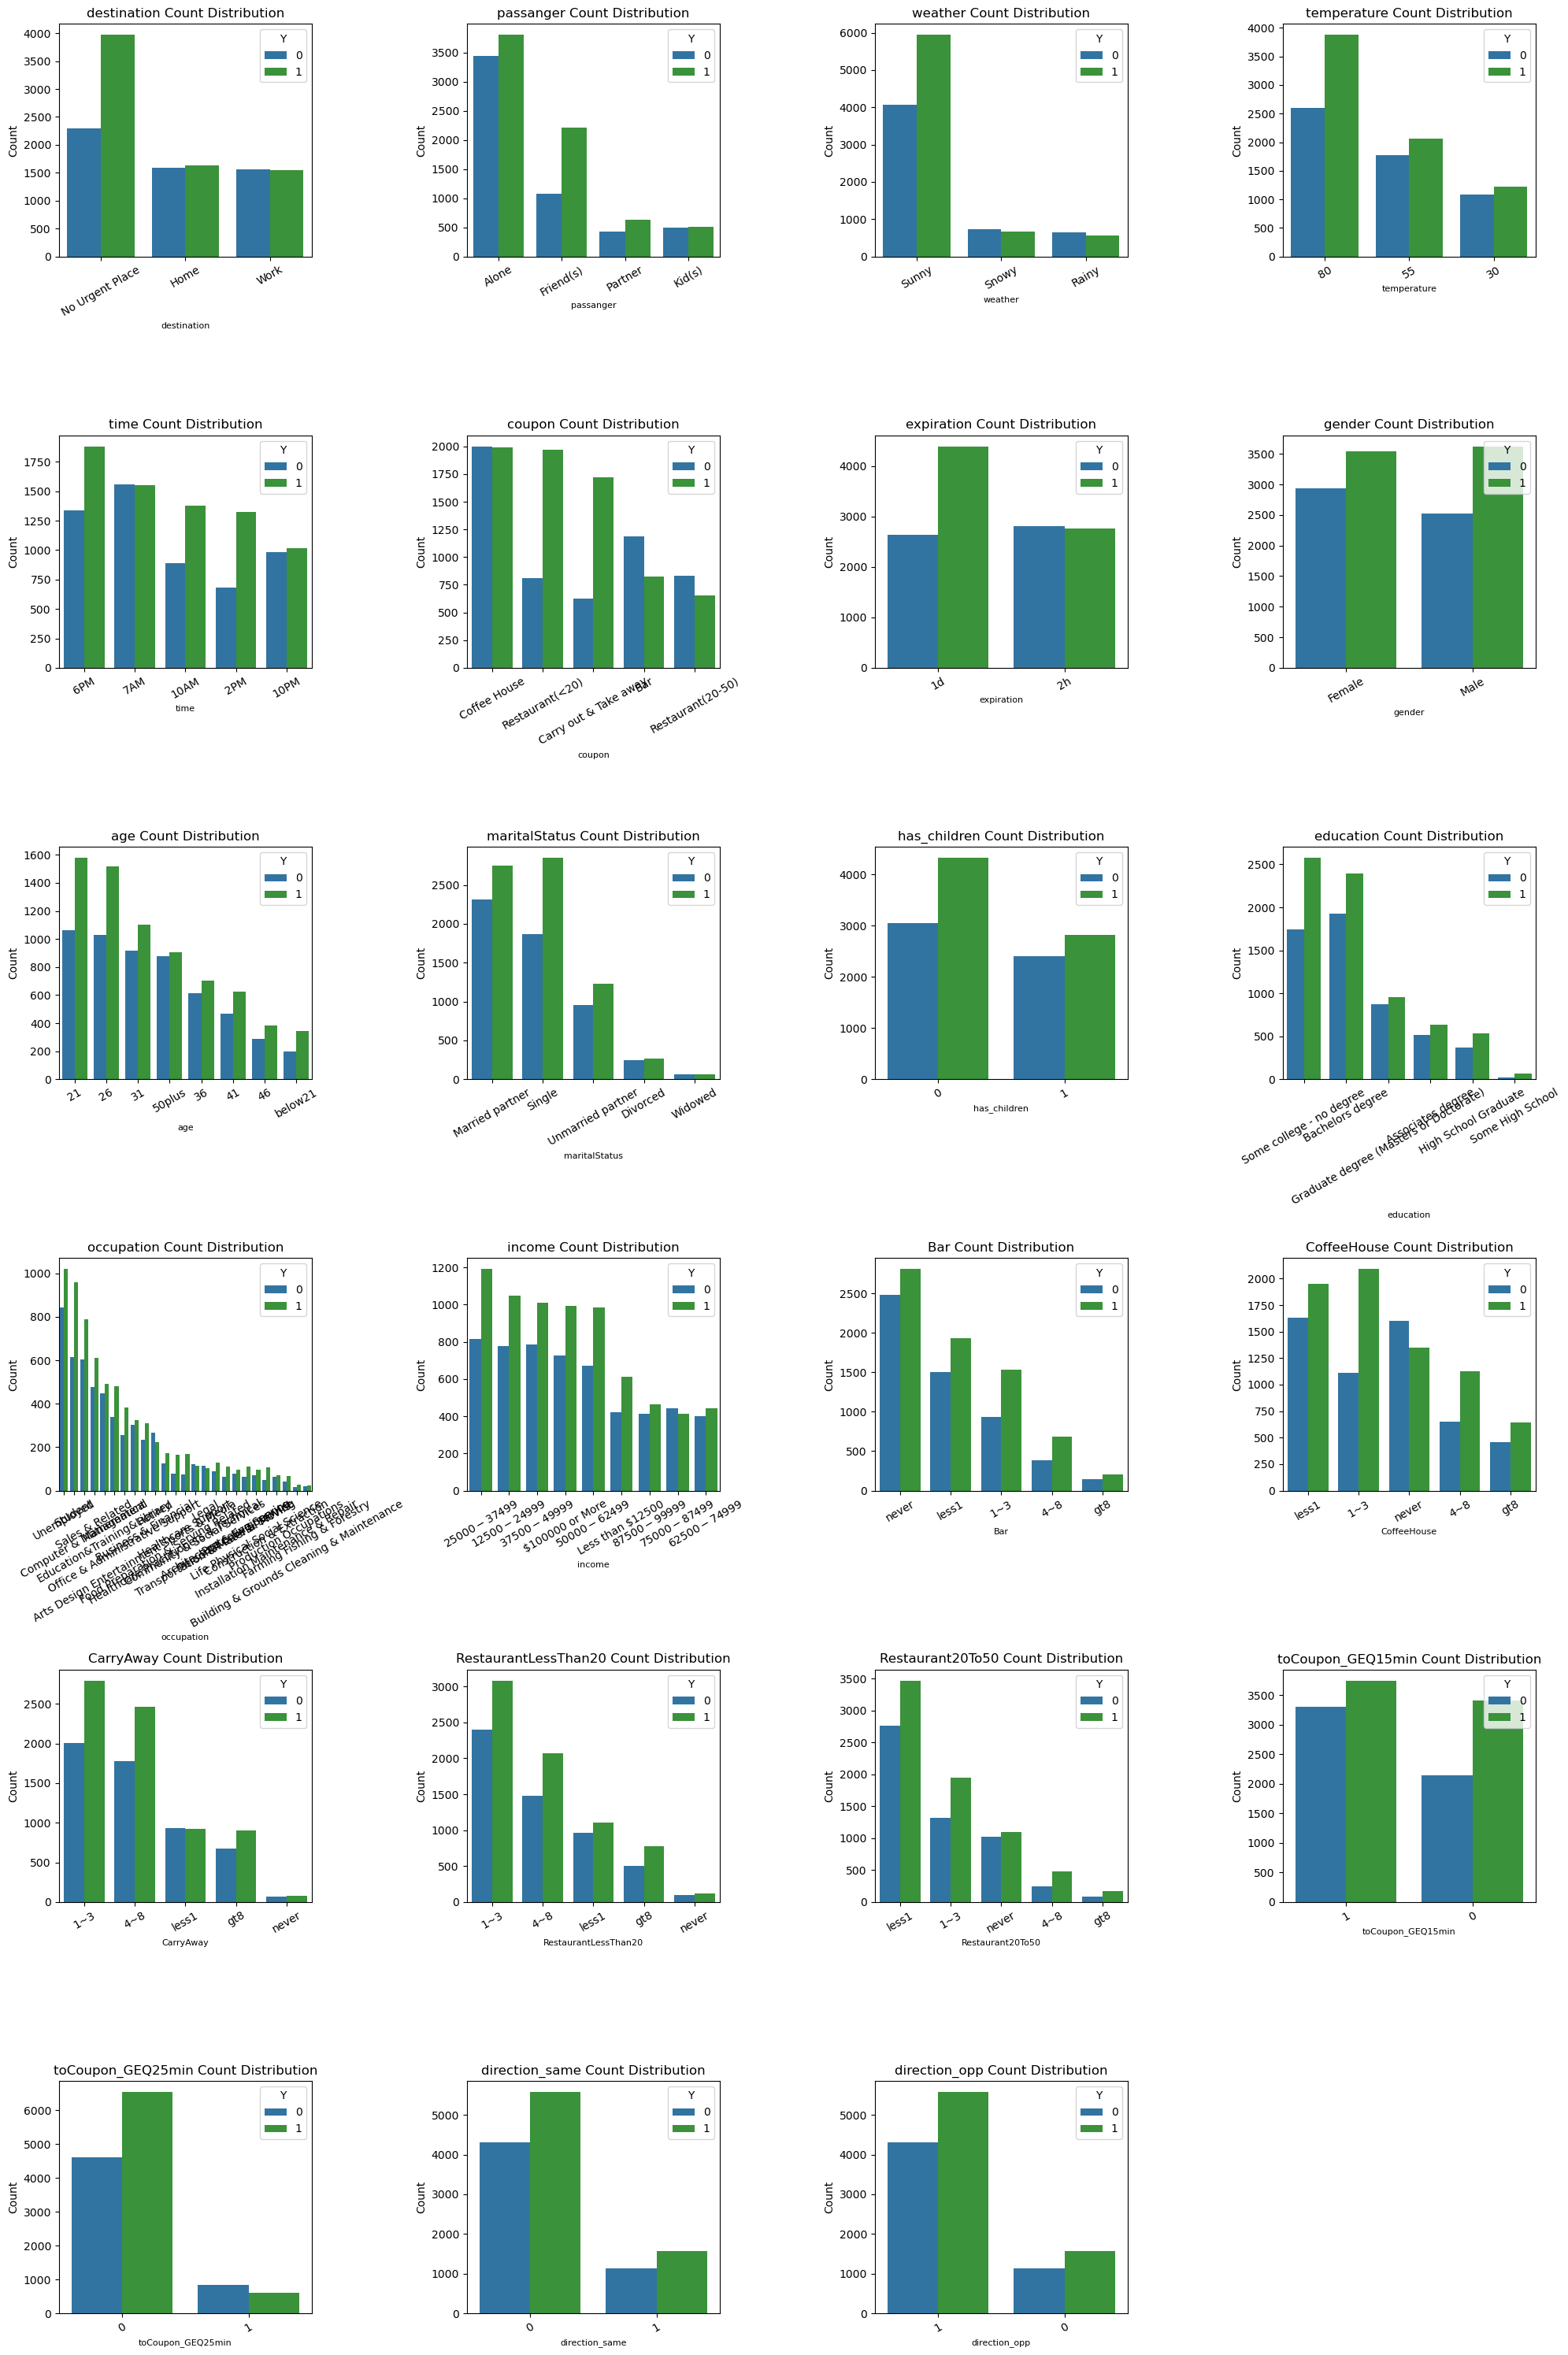

In [29]:
# Create bar plot to all the variables to explore and understand the attributes of high acceptance rate
# Create 
columns= ['coupon','destination', 'passanger', 'weather', 'time', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 
          'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50','temperature']
columns2=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
          'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
          'toCoupon_GEQ25min', 'direction_same', 'direction_opp']
# Define grid size (e.g. 4 rows × 5 columns for 17 plots)
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
axes = axes.flatten()
custom_palette = ["#1f77b4", "#2ca02c"]  # Blue for 0, Green for 1

for i, col in enumerate(columns2):
    order = data3[col].value_counts().index  # Sort by frequency

    sns.countplot(data=data3, x=col, hue="Y", ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f"{col} Count Distribution", fontsize=12)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=30)

# Remove empty subplots if fewer than grid size
for j in range(len(columns2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[Back to Top](#analysis-outline)


### Section 4 Correlation Analysis
#### Section Summary
- Features showed moderate positive correlation with coupon acceptance (Y), including:
   `coupon_Carry out & Take away`, `coupon_Restaurant(<20)`, `destination_No Urgent Place`, `expiration_2h`, `passanger_Friend(s)`,
   `CoffeeHouse_never`, `toCoupon_GEQ25min`, `weather_Sunny`, `coupon_Coffee House`, `coupon_Restaurant(20-50)`
- Correlation between **Destination** `No Urgent Place` (acceptance rate = 63%) and **Passanger** `Friend(s)` (67%) shows high (0.6)

- Statistical significance of these relationships implies non-random influence; Visualizations and grouped means (groupby().mean()) across categories confirmed patterns observed in descriptive stats and hinted at potential predictive variables.
   - e.g., When age is ‘below21’, the acceptance rate is highest 63%, the rate increases with age decreasing, the younger age, more likely to accept.

#### Review correlation matrix and identify top 10 correlations with Y


In [35]:
# Convert categories to binary features
data3_encoded = pd.get_dummies(data3, columns= ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', \
                                                 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',\
                                                 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], drop_first=True, dtype=int)
data3_encoded.head(3)
# OneHotEncoder(drop='first')

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,passanger_Friend(s),...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,80,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,80,1,1,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
data3_encoded.corr()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,passanger_Friend(s),...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
temperature,1.000000,-0.018599,-0.157089,-0.227165,0.097972,-0.097972,0.059393,0.139103,-0.107002,0.105435,...,-0.026467,-0.011634,0.006226,0.032216,-0.005828,-0.030444,-0.040717,0.000505,-0.035238,0.041856
has_children,-0.018599,1.000000,0.079434,-0.010773,-0.032353,0.032353,-0.045056,0.022429,-0.017093,-0.049322,...,0.013455,0.067847,-0.039635,-0.035904,-0.030178,-0.030533,0.043644,-0.043211,0.022727,-0.018758
toCoupon_GEQ15min,-0.157089,0.079434,1.000000,0.321260,-0.302066,0.302066,-0.082693,0.039725,0.089575,0.128087,...,0.006296,0.007190,0.000019,-0.008276,0.008480,0.001718,-0.005842,-0.010919,0.004309,-0.003366
toCoupon_GEQ25min,-0.227165,-0.010773,0.321260,1.000000,-0.189900,0.189900,-0.108139,-0.360045,0.361601,-0.215334,...,0.006637,0.000828,-0.005623,-0.007159,0.003826,-0.000774,-0.005799,-0.002818,-0.000891,0.007816
direction_same,0.097972,-0.032353,-0.302066,-0.189900,1.000000,-1.000000,0.014932,-0.520950,0.235593,-0.311567,...,0.006248,0.005721,-0.003355,-0.008504,0.004482,0.010033,0.011646,-0.007952,-0.012665,0.020423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RestaurantLessThan20_never,-0.030444,-0.030533,0.001718,-0.000774,0.010033,-0.010033,-0.008941,-0.005855,-0.000115,-0.000239,...,0.131948,-0.014685,-0.083267,-0.044724,-0.058933,1.000000,-0.032907,-0.019441,-0.104660,0.188464
Restaurant20To50_4~8,-0.040717,0.043644,-0.005842,-0.005799,0.011646,-0.011646,0.043795,-0.001869,-0.006132,-0.008557,...,-0.060311,-0.027341,0.114036,0.137246,-0.069346,-0.032907,1.000000,-0.036196,-0.244599,-0.111339
Restaurant20To50_gt8,0.000505,-0.043211,-0.010919,-0.002818,-0.007952,0.007952,0.028134,0.006444,0.002320,0.027845,...,-0.026166,-0.016152,-0.064501,0.394359,-0.064823,-0.019441,-0.036196,1.000000,-0.144502,-0.065776
Restaurant20To50_less1,-0.035238,0.022727,0.004309,-0.000891,-0.012665,0.012665,-0.021750,0.009602,-0.005326,0.007071,...,0.032956,0.049279,-0.066769,-0.148206,0.064141,-0.104660,-0.244599,-0.144502,1.000000,-0.444488


In [38]:
# Review top 10 features

import pandas as pd

# Create correlation matrix
corr_matrix = data3_encoded.corr()

# Extract correlations with target only
target_corr = corr_matrix['Y'].drop('Y')

# Sort by strength of relationship
top_corr = target_corr.abs().sort_values(ascending=False)

print(top_corr.head(10))  # Top 10 correlated features with target

coupon_Carry out & Take away    0.160325
coupon_Restaurant(<20)          0.150508
destination_No Urgent Place     0.132106
expiration_2h                   0.128737
passanger_Friend(s)             0.126674
CoffeeHouse_never               0.122587
toCoupon_GEQ25min               0.108139
weather_Sunny                   0.102533
coupon_Coffee House             0.094664
coupon_Restaurant(20-50)        0.093052
Name: Y, dtype: float64


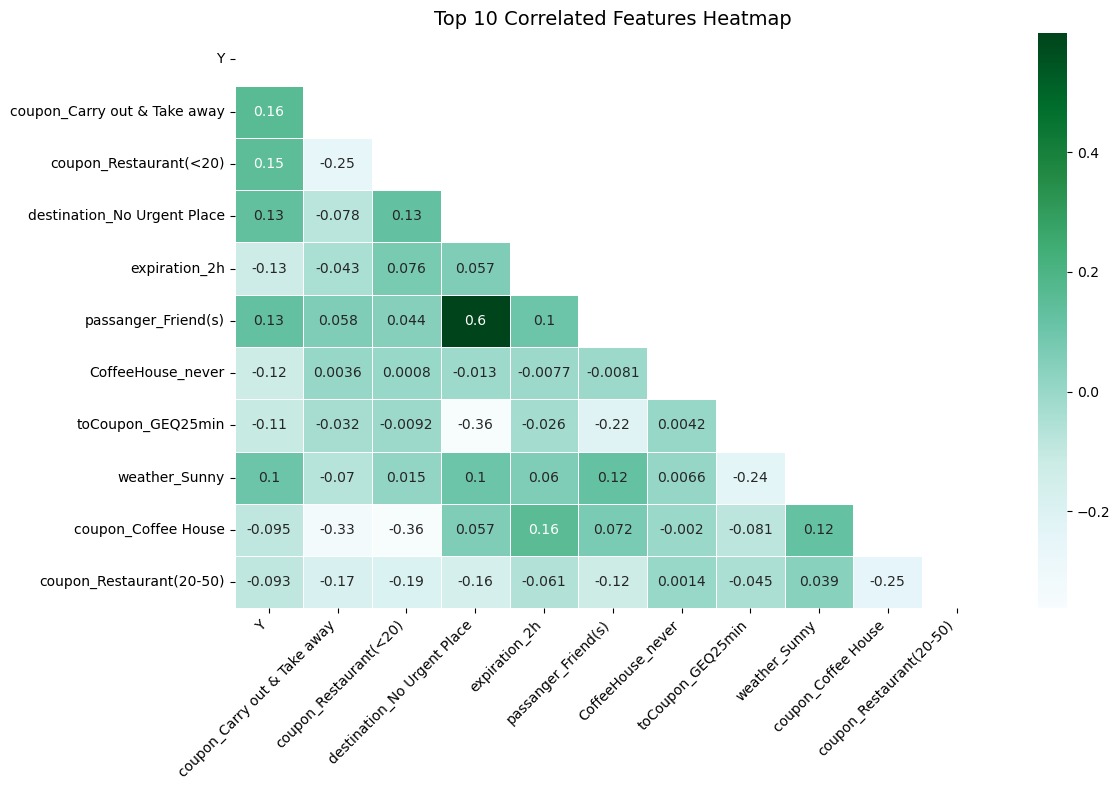

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare correlation data
data3_top10corr = data3_encoded[['Y', 'coupon_Carry out & Take away', 'coupon_Restaurant(<20)',
                                 'destination_No Urgent Place', 'expiration_2h', 'passanger_Friend(s)',
                                 'CoffeeHouse_never', 'toCoupon_GEQ25min', 'weather_Sunny',
                                 'coupon_Coffee House', 'coupon_Restaurant(20-50)']]

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(data3_top10corr.corr(), dtype=bool))
sns.heatmap(data3_top10corr.corr(), annot=True, cmap='BuGn', linewidths=0.5, mask=mask)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title("Top 10 Correlated Features Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

[Back to Top](#analysis-outline)

### Section 5 Next Steps and Recommendations

**1. Data Expansion:** Investigate outliers, duplicates, and potential sampling biases

**2. Multicollinearity Review:** Use techniques like PCA or VIF to manage highly correlated features

**3. Feature Engineering:** Create meaningful features, composite features, and/or interaction terms.

  - e.g.: Consider combining variables like Destination + Passanger or Coupon Type + Time into interaction terms. Their joint effect seems significant based on this analysis.

**4. Feature Selection:** Rank feature importance via statistical or model-based methods

**5. Predictive Modeling:** Train models using logistic regression, decision trees, or ensemble methods to predict coupon acceptance with the main impactful variables which could be used to verify hypotheses around variable impact

**6. Model Optimization:** model tuning, testing, and validation to ensure generalizability
